## Clasificando voces humanas por género

descripcion

In [116]:
import pandas as pd
from imblearn.over_sampling import SMOTE

In [117]:
df = pd.read_csv('../data/100000/cv-valid-train_Bark_Bands_spectrum_pars.csv')

In [118]:
df.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration,bb1,bb2,...,bb24,ok,pow,mfq,std,modafq,medianfq,IQR,Q1,Q3
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1.0,0.0,NaN,NaN,NaN,NaN,0.002633,0.086439,...,0.000718,1.0,1.650145e-03,1213.752897,1388.294226,192.279502,738.578060,1100.415343,443.684339,1544.099682
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1.0,0.0,NaN,NaN,NaN,NaN,0.001395,0.224020,...,0.000032,1.0,7.916365e-07,456.555733,379.835427,135.382170,437.673864,318.187839,249.966883,568.154722
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1.0,0.0,NaN,NaN,NaN,NaN,0.000594,0.301720,...,0.000052,1.0,6.124250e-04,2557.028597,2663.549506,155.946962,504.056996,4553.334653,171.185434,4724.520087
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1.0,0.0,NaN,NaN,NaN,NaN,0.000953,0.028043,...,0.000403,1.0,1.982778e-05,524.126760,819.548646,468.886545,451.559440,227.361760,253.879765,481.241525
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3.0,2.0,NaN,NaN,NaN,NaN,0.000661,0.128622,...,0.000383,1.0,4.150297e-02,652.053861,1263.434945,213.101331,224.564995,249.744115,209.416581,459.160696


In [119]:
df = df[df['ok']==1]

In [120]:
df = df[~df['gender'].isna()]

In [121]:
df = df[~(df['gender']=='other')]


In [122]:
df = df.loc[:,['gender','bb1','bb2','bb3','bb4','bb5','bb6','bb7','bb8','bb9','bb10','bb11','bb12','bb13','bb14','bb15','bb16','bb17','bb18','bb19','bb20','bb21','bb22','bb23','bb24','pow','mfq','std','modafq','medianfq','IQR','Q1','Q3']]

In [123]:
df.head(4)

,gender,bb1,bb2,bb3,bb4,bb5,bb6,bb7,bb8,bb9,...,bb23,bb24,pow,mfq,std,modafq,medianfq,IQR,Q1,Q3
5,female,0.000164,0.346419,0.309572,0.112718,0.089885,0.026873,0.006768,0.010106,0.021302,...,3.980795e-07,4.578924e-07,0.000017,545.024555,993.741931,192.406803,207.180897,195.499055,194.640096,390.139151
8,male,0.000256,0.010624,0.026257,0.072948,0.370282,0.088766,0.126652,0.009465,0.002699,...,7.335723e-05,1.371439e-05,0.000257,839.337584,732.968113,443.214910,542.224811,779.266162,433.896331,1213.162493
13,female,0.000013,0.012291,0.024824,0.073325,0.079520,0.086500,0.017077,0.083755,0.056664,...,8.351631e-09,7.498852e-08,0.000630,1356.506599,801.070553,538.333729,1377.877997,1371.469262,553.999525,1925.468787
14,male,0.000255,0.136101,0.154552,0.116748,0.447025,0.064714,0.049373,0.014565,0.001376,...,2.188191e-05,2.538794e-06,0.000361,438.110419,461.466344,443.802423,436.533085,224.417521,256.849953,481.267474


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38902 entries, 5 to 104700
Data columns (total 33 columns):
gender      38902 non-null object
bb1         38899 non-null float64
bb2         38899 non-null float64
bb3         38899 non-null float64
bb4         38899 non-null float64
bb5         38899 non-null float64
bb6         38899 non-null float64
bb7         38899 non-null float64
bb8         38899 non-null float64
bb9         38899 non-null float64
bb10        38899 non-null float64
bb11        38899 non-null float64
bb12        38899 non-null float64
bb13        38899 non-null float64
bb14        38899 non-null float64
bb15        38899 non-null float64
bb16        38899 non-null float64
bb17        38899 non-null float64
bb18        38899 non-null float64
bb19        38899 non-null float64
bb20        38899 non-null float64
bb21        38899 non-null float64
bb22        38899 non-null float64
bb23        38899 non-null float64
bb24        38899 non-null float64
pow         3890

In [125]:
df.isnull().any()

gender      False
bb1          True
bb2          True
bb3          True
bb4          True
bb5          True
bb6          True
bb7          True
bb8          True
bb9          True
bb10         True
bb11         True
bb12         True
bb13         True
bb14         True
bb15         True
bb16         True
bb17         True
bb18         True
bb19         True
bb20         True
bb21         True
bb22         True
bb23         True
bb24         True
pow          True
mfq          True
std          True
modafq       True
medianfq     True
IQR          True
Q1           True
Q3           True
dtype: bool

In [126]:
df.isnull().sum().sum()

80

In [127]:
df = df.dropna()

In [128]:
df.isnull().sum().sum()

0

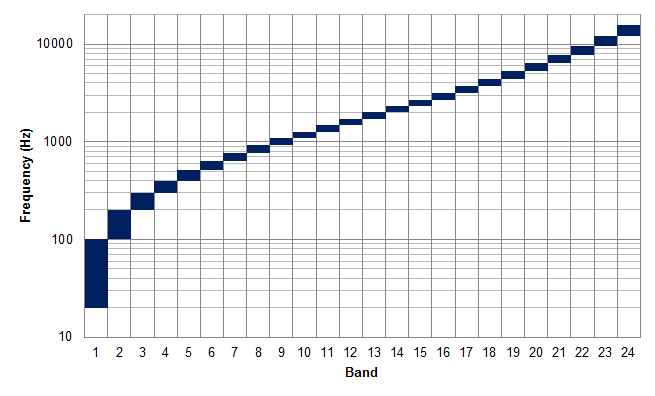

BandBarks = (20 100 200 300 400 510 630 770 920 1080 1270 1480 1720 2000 2320 2700 3150 3700 4400 5300 6400 7700 9500 12000 15500)

https://en.wikipedia.org/wiki/Bark_scale

In [129]:
import warnings
warnings.filterwarnings("ignore")
import seaborn

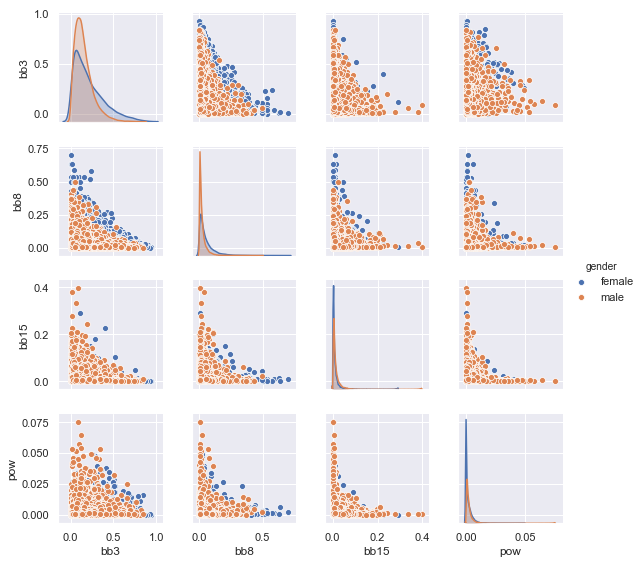

In [130]:
seaborn.pairplot(df[['gender','bb3','bb8','bb15','pow']], 
                 hue='gender', height=2)

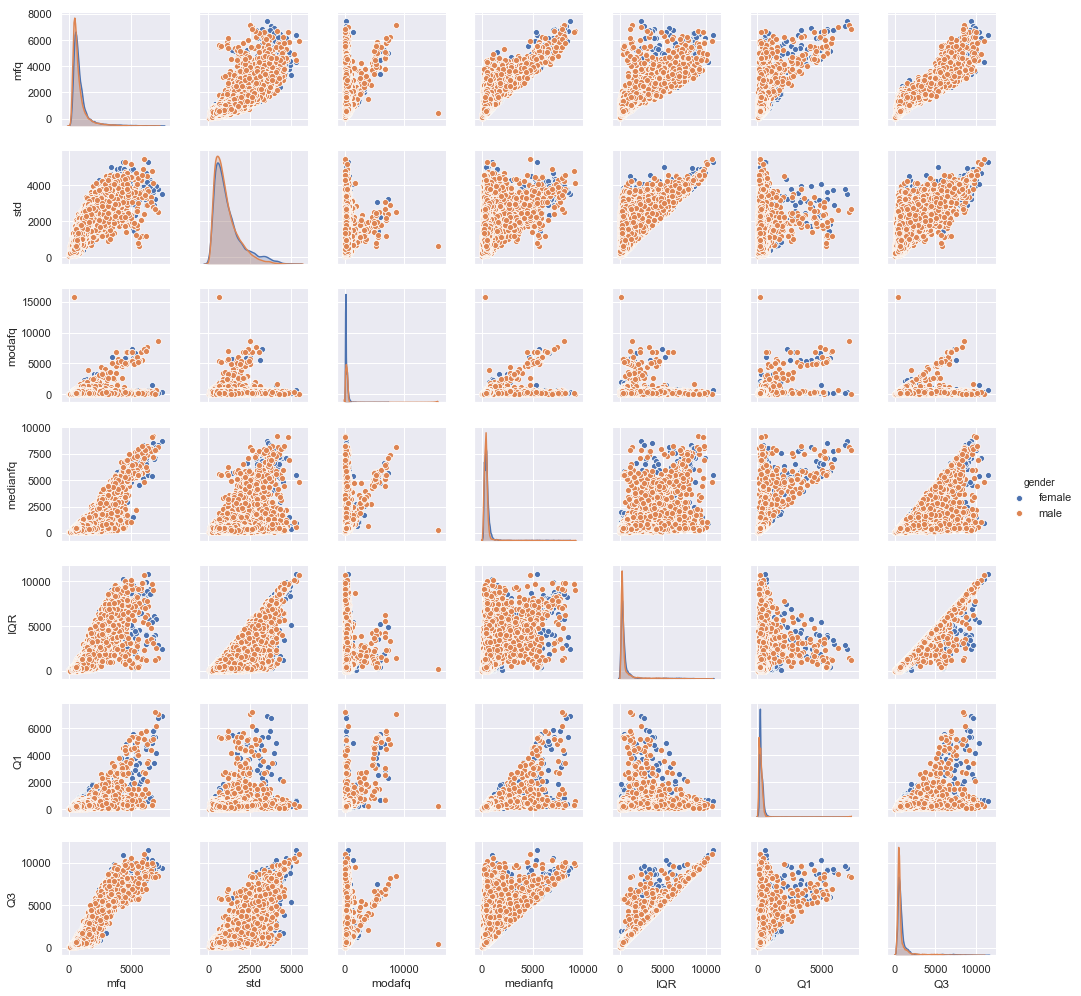

In [131]:
seaborn.pairplot(df[['gender','mfq','std','modafq','medianfq','IQR','Q1','Q3']], 
                 hue='gender', height=2)

Transformamos la clase en 0 y 1 con LabelEncoder

In [132]:
y = df["gender"]
X = df.drop("gender", axis = 1)

In [133]:
print("el dataset tiene ", X.shape[0], " filas y ", X.shape[1], " columnas")

el dataset tiene  38899  filas y  32  columnas


In [134]:
from sklearn.preprocessing import LabelEncoder

Usamos LabelEncoder para transformar la clase en un array de 0 y 1

In [135]:
encoder = LabelEncoder()

In [136]:
y.head()

5     female
8       male
13    female
14      male
19      male
Name: gender, dtype: object

In [137]:
y.value_counts()

male      29185
female     9714
Name: gender, dtype: int64

In [138]:
y.unique()

array(['female', 'male'], dtype=object)

In [139]:
y = encoder.fit_transform(y)

In [140]:
y

array([0, 1, 0, ..., 1, 1, 1])

Hagamos un split en train y test.

In [141]:
from sklearn.model_selection import train_test_split

Con la información de train vamos a realizar la búsqueda de hiperparámetros y ajustar el mejor modelo.

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

## Balanceando las clases

Equilibramos las proporciones de ambas clases con SMOTE

In [143]:
sm = SMOTE(random_state=12)
X_train, y_train = sm.fit_sample(X_train, y_train)


In [144]:
print('En el set de entrenamiento hay' , len(y_train),'muestras, de las cuales' ,y_train.sum(),'son hombres.') 

En el set de entrenamiento hay 43778 muestras, de las cuales 21889 son hombres.


In [145]:
print('En el set de testeo hay' , len(y_test),'muestras, de las cuales' ,y_test.sum(),'son hombres.') 

En el set de testeo hay 9725 muestras, de las cuales 7296 son hombres.


## Knn - Benchmark

Comencemos probando Knn, que será nuestro benchmark

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
import numpy as np
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [147]:
model_knn = KNeighborsClassifier()

In [148]:
params = {"n_neighbors":list(range(3,8))}

In [149]:
knn = GridSearchCV(model_knn, params, verbose= True)

In [150]:
stds = StandardScaler()

In [151]:
X_train_knn = stds.fit_transform(X_train)

In [152]:
X_test_knn = stds.transform(X_test)

In [153]:
start = time.time()
knn.fit(X_train_knn, y_train)
end = time.time()
print("La búsqueda con knn llevó: ", end - start, " segundos")

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


La búsqueda con knn llevó:  722.4794485569  segundos


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 12.0min finished


In [155]:
knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [156]:
y_predicted_knn = knn.predict_proba(X_test_knn)
knn_auc = roc_auc_score(y_test, y_predicted_knn[:,1])
print("El valor del AUC es: ", knn_auc)

El valor del AUC es:  0.83586061808881


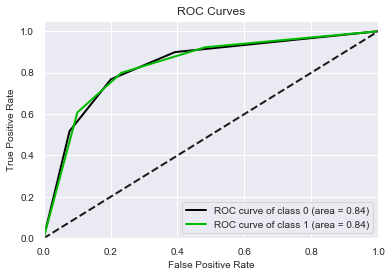

In [157]:
%matplotlib inline
plot_roc(y_test,y_predicted_knn, plot_micro = False, plot_macro= False);

## Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
model_rf = RandomForestClassifier()

In [160]:
import scipy.stats as st

A RandomizedSearchCV los hiperparámetros se los podemos pasar como una lista o también como una distribución de scipy.

In [161]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12)     # Maximum tree depth for base learners.
}

In [162]:
rf = RandomizedSearchCV(model_rf,params, n_iter=25, verbose= True)

In [163]:
start = time.time()
rf.fit(X_train,y_train)
end = time.time()
print("La búsqueda con Random Forest llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.1min finished


La búsqueda con Random Forest llevó:  130.56688904762268  segundos


In [164]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
y_predicted_rf = rf.predict_proba(X_test)

In [166]:
rf_auc = roc_auc_score(y_test,y_predicted_rf[:,1])
print("El valor del AUC es: ", rf_auc)

El valor del AUC es:  0.934210639169971


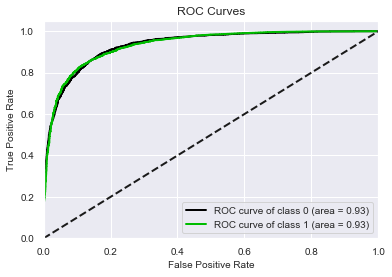

In [167]:
%matplotlib inline
plot_roc(y_test,y_predicted_rf, plot_micro = False, plot_macro= False);

## Xgboost

Vamos a importar el clasificador XGBoost del módulo xgboost.sklearn que nos provee clases y métodos aceptados por la API de sklearn. La clase que contiene este clasificador se llama XGBClassifier

In [168]:
from xgboost.sklearn import XGBClassifier

In [169]:
model_xg = XGBClassifier(n_jobs=-1)

Podemos partir del siguiente conjunto de hiperparámetros, que serán empleados también luego.

In [170]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

In [171]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

Realizamos la búsqueda de hiperparámetrosRandomiezSearchCV con 25 iteraciones

In [172]:
xgb = RandomizedSearchCV(model_xg,params, n_iter=25, verbose= True)

Busco el mejor set de hiperparámetros y calculamos el tiempo

No es necesario normalizar los features antes de aplicar XGBoost

In [173]:
start = time.time()
xgb.fit(X_train,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.3min finished


La búsqueda con XGBoost llevó:  78.42626476287842  segundos


In [176]:
X_matrix = X_test.as_matrix() # arregla el bug de XGBoost
#y_matrix = y.as_matrix()

y_predicted_xgb = xgb.predict_proba(X_matrix)

In [177]:
y_predicted_xgb[:,0].shape

(9725,)

In [178]:
xgb_auc = roc_auc_score(y_test,y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.9597132578384


Graficamos la curva ROC por clase

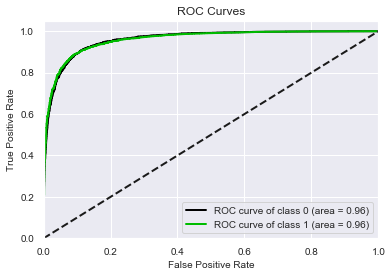

In [179]:
plot_roc(y_test,y_predicted_xgb, plot_micro = False, plot_macro= False);

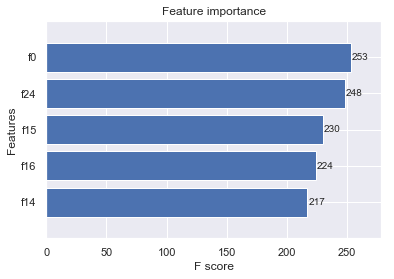

In [180]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

También se pueden acceder los valores directamente con el atributo feature_importances_

In [181]:
print(xgb.best_estimator_.feature_importances_)

[0.05542169 0.04271632 0.04359255 0.03548741 0.02628697 0.03198247
 0.0245345  0.0313253  0.02343921 0.02628697 0.02694414 0.02102957
 0.03789704 0.02891566 0.0475356  0.05038335 0.049069   0.02256298
 0.03592552 0.0230011  0.02584885 0.02935378 0.02322015 0.04403067
 0.0543264  0.01401972 0.01336254 0.03373494 0.01905805 0.01314348
 0.03263965 0.01292443]


## LightGBM

La librería lightgbm permite directamente interactuar con SciKitLearn

In [182]:
import lightgbm as lgb

In [183]:
model_lgb = lgb.LGBMClassifier()

 Usamos los mismos rangos de hiperparámetros que para XGBoost. La lista completa de hiperparámetros se puede consultar <a = "https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst"> aquí </a>

¿Es necesario normalizar los features antes de aplicar LightGBM?

In [184]:
lgbm = RandomizedSearchCV(model_lgb, params, n_iter = 25, verbose= True)

In [185]:
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    9.6s finished


La búsqueda con LightGBM llevó:  9.962360143661499  segundos


In [186]:
print('Best parameters found by grid search are:', lgbm.best_params_)

Best parameters found by grid search are: {'colsample_bytree': 0.9823026193034052, 'gamma': 3.4353803954432283, 'learning_rate': 0.4042301855169825, 'max_depth': 8, 'min_child_weight': 9.21517321297389, 'n_estimators': 38, 'reg_alpha': 4.713891312724232, 'subsample': 0.9841435372466995}


In [187]:
y_predicted_lgbm = lgbm.predict_proba(X_test)

In [188]:
lgbm_auc = roc_auc_score(y_test,y_predicted_lgbm[:,1])
print("El valor del AUC es: ", lgbm_auc)

El valor del AUC es:  0.9558131866048407


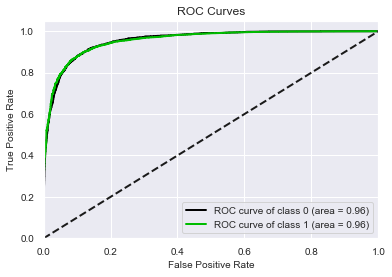

In [189]:
plot_roc(y_test,y_predicted_lgbm, plot_micro = False, plot_macro= False);

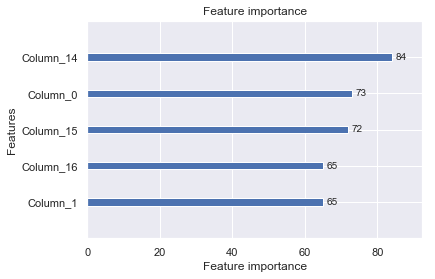

In [190]:
lgb.plot_importance(lgbm.best_estimator_, max_num_features=5);

In [191]:
lgbm.best_estimator_.feature_importances_

array([73, 65, 49, 43, 27, 27, 25, 37, 18, 23, 20, 15, 44, 24, 84, 72, 65,
       21, 41, 16, 26, 35, 27, 58, 62,  5, 11, 50, 10, 10, 44, 13])

## CatBoost

In [192]:
from catboost import CatBoostClassifier

In [193]:
model_cat = CatBoostClassifier()

¿Es necesario normalizar los features antes de aplicar CatBoost?

Con CatBoost los resultados sin hacer una búsqueda de hiperparámetros ya son... ¡excelentes!

In [194]:
model_cat.fit(X_train, y_train)

0:	learn: 0.6719177	total: 48.8ms	remaining: 48.8s
1:	learn: 0.6532780	total: 90.7ms	remaining: 45.3s
2:	learn: 0.6362409	total: 132ms	remaining: 43.8s
3:	learn: 0.6205325	total: 174ms	remaining: 43.4s
4:	learn: 0.6068122	total: 216ms	remaining: 42.9s
5:	learn: 0.5943206	total: 260ms	remaining: 43.1s
6:	learn: 0.5828132	total: 304ms	remaining: 43.1s
7:	learn: 0.5738917	total: 346ms	remaining: 42.9s
8:	learn: 0.5636387	total: 388ms	remaining: 42.8s
9:	learn: 0.5548432	total: 430ms	remaining: 42.5s
10:	learn: 0.5477012	total: 473ms	remaining: 42.5s
11:	learn: 0.5403546	total: 516ms	remaining: 42.5s
12:	learn: 0.5325356	total: 559ms	remaining: 42.4s
13:	learn: 0.5264828	total: 601ms	remaining: 42.3s
14:	learn: 0.5208212	total: 641ms	remaining: 42.1s
15:	learn: 0.5143862	total: 681ms	remaining: 41.9s
16:	learn: 0.5099429	total: 728ms	remaining: 42.1s
17:	learn: 0.5037584	total: 769ms	remaining: 42s
18:	learn: 0.4985424	total: 812ms	remaining: 41.9s
19:	learn: 0.4945234	total: 855ms	remaini

162:	learn: 0.3043454	total: 7.22s	remaining: 37.1s
163:	learn: 0.3040389	total: 7.27s	remaining: 37.1s
164:	learn: 0.3036218	total: 7.32s	remaining: 37s
165:	learn: 0.3030576	total: 7.36s	remaining: 37s
166:	learn: 0.3025607	total: 7.4s	remaining: 36.9s
167:	learn: 0.3021592	total: 7.45s	remaining: 36.9s
168:	learn: 0.3016242	total: 7.49s	remaining: 36.8s
169:	learn: 0.3011833	total: 7.53s	remaining: 36.8s
170:	learn: 0.3008091	total: 7.57s	remaining: 36.7s
171:	learn: 0.3003378	total: 7.62s	remaining: 36.7s
172:	learn: 0.2999953	total: 7.67s	remaining: 36.7s
173:	learn: 0.2995286	total: 7.73s	remaining: 36.7s
174:	learn: 0.2991179	total: 7.78s	remaining: 36.7s
175:	learn: 0.2986501	total: 7.83s	remaining: 36.6s
176:	learn: 0.2982501	total: 7.87s	remaining: 36.6s
177:	learn: 0.2978649	total: 7.92s	remaining: 36.6s
178:	learn: 0.2974951	total: 7.96s	remaining: 36.5s
179:	learn: 0.2970640	total: 8.01s	remaining: 36.5s
180:	learn: 0.2966478	total: 8.04s	remaining: 36.4s
181:	learn: 0.296

323:	learn: 0.2510836	total: 14.1s	remaining: 29.4s
324:	learn: 0.2508002	total: 14.2s	remaining: 29.4s
325:	learn: 0.2506742	total: 14.2s	remaining: 29.4s
326:	learn: 0.2504489	total: 14.2s	remaining: 29.3s
327:	learn: 0.2502566	total: 14.3s	remaining: 29.3s
328:	learn: 0.2501305	total: 14.3s	remaining: 29.2s
329:	learn: 0.2499245	total: 14.4s	remaining: 29.2s
330:	learn: 0.2496597	total: 14.4s	remaining: 29.1s
331:	learn: 0.2494533	total: 14.5s	remaining: 29.1s
332:	learn: 0.2492762	total: 14.5s	remaining: 29s
333:	learn: 0.2490634	total: 14.5s	remaining: 29s
334:	learn: 0.2488371	total: 14.6s	remaining: 28.9s
335:	learn: 0.2485266	total: 14.6s	remaining: 28.9s
336:	learn: 0.2483538	total: 14.7s	remaining: 28.8s
337:	learn: 0.2481533	total: 14.7s	remaining: 28.8s
338:	learn: 0.2479527	total: 14.8s	remaining: 28.8s
339:	learn: 0.2476324	total: 14.8s	remaining: 28.7s
340:	learn: 0.2474163	total: 14.9s	remaining: 28.7s
341:	learn: 0.2471187	total: 14.9s	remaining: 28.7s
342:	learn: 0.24

482:	learn: 0.2201687	total: 20.9s	remaining: 22.3s
483:	learn: 0.2200251	total: 20.9s	remaining: 22.3s
484:	learn: 0.2199229	total: 20.9s	remaining: 22.2s
485:	learn: 0.2198068	total: 21s	remaining: 22.2s
486:	learn: 0.2196980	total: 21s	remaining: 22.1s
487:	learn: 0.2196149	total: 21.1s	remaining: 22.1s
488:	learn: 0.2194993	total: 21.1s	remaining: 22.1s
489:	learn: 0.2193170	total: 21.1s	remaining: 22s
490:	learn: 0.2190949	total: 21.2s	remaining: 22s
491:	learn: 0.2189927	total: 21.2s	remaining: 21.9s
492:	learn: 0.2188109	total: 21.3s	remaining: 21.9s
493:	learn: 0.2186641	total: 21.3s	remaining: 21.8s
494:	learn: 0.2184888	total: 21.4s	remaining: 21.8s
495:	learn: 0.2184145	total: 21.4s	remaining: 21.7s
496:	learn: 0.2181930	total: 21.4s	remaining: 21.7s
497:	learn: 0.2180606	total: 21.5s	remaining: 21.6s
498:	learn: 0.2178681	total: 21.5s	remaining: 21.6s
499:	learn: 0.2177924	total: 21.6s	remaining: 21.6s
500:	learn: 0.2176067	total: 21.6s	remaining: 21.5s
501:	learn: 0.217498

643:	learn: 0.1996718	total: 27.6s	remaining: 15.3s
644:	learn: 0.1995812	total: 27.7s	remaining: 15.2s
645:	learn: 0.1995034	total: 27.7s	remaining: 15.2s
646:	learn: 0.1993713	total: 27.7s	remaining: 15.1s
647:	learn: 0.1992826	total: 27.8s	remaining: 15.1s
648:	learn: 0.1990840	total: 27.8s	remaining: 15.1s
649:	learn: 0.1989956	total: 27.9s	remaining: 15s
650:	learn: 0.1988462	total: 27.9s	remaining: 15s
651:	learn: 0.1987059	total: 28s	remaining: 14.9s
652:	learn: 0.1985769	total: 28s	remaining: 14.9s
653:	learn: 0.1985141	total: 28s	remaining: 14.8s
654:	learn: 0.1984352	total: 28.1s	remaining: 14.8s
655:	learn: 0.1982790	total: 28.1s	remaining: 14.7s
656:	learn: 0.1981641	total: 28.2s	remaining: 14.7s
657:	learn: 0.1980968	total: 28.2s	remaining: 14.7s
658:	learn: 0.1979765	total: 28.2s	remaining: 14.6s
659:	learn: 0.1978975	total: 28.3s	remaining: 14.6s
660:	learn: 0.1978478	total: 28.3s	remaining: 14.5s
661:	learn: 0.1977531	total: 28.4s	remaining: 14.5s
662:	learn: 0.1975789	

805:	learn: 0.1841378	total: 34.4s	remaining: 8.29s
806:	learn: 0.1840572	total: 34.5s	remaining: 8.25s
807:	learn: 0.1838375	total: 34.5s	remaining: 8.2s
808:	learn: 0.1836730	total: 34.6s	remaining: 8.16s
809:	learn: 0.1836495	total: 34.6s	remaining: 8.12s
810:	learn: 0.1836097	total: 34.6s	remaining: 8.07s
811:	learn: 0.1835245	total: 34.7s	remaining: 8.03s
812:	learn: 0.1835032	total: 34.7s	remaining: 7.99s
813:	learn: 0.1833805	total: 34.8s	remaining: 7.95s
814:	learn: 0.1832993	total: 34.8s	remaining: 7.9s
815:	learn: 0.1831991	total: 34.9s	remaining: 7.86s
816:	learn: 0.1830405	total: 34.9s	remaining: 7.82s
817:	learn: 0.1829248	total: 34.9s	remaining: 7.77s
818:	learn: 0.1827727	total: 35s	remaining: 7.73s
819:	learn: 0.1827440	total: 35s	remaining: 7.69s
820:	learn: 0.1826486	total: 35.1s	remaining: 7.65s
821:	learn: 0.1825933	total: 35.1s	remaining: 7.61s
822:	learn: 0.1824434	total: 35.2s	remaining: 7.57s
823:	learn: 0.1823777	total: 35.2s	remaining: 7.52s
824:	learn: 0.1823

964:	learn: 0.1720129	total: 40.9s	remaining: 1.48s
965:	learn: 0.1719789	total: 41s	remaining: 1.44s
966:	learn: 0.1719216	total: 41s	remaining: 1.4s
967:	learn: 0.1718549	total: 41s	remaining: 1.36s
968:	learn: 0.1717510	total: 41.1s	remaining: 1.31s
969:	learn: 0.1717457	total: 41.1s	remaining: 1.27s
970:	learn: 0.1717230	total: 41.1s	remaining: 1.23s
971:	learn: 0.1716244	total: 41.2s	remaining: 1.19s
972:	learn: 0.1715288	total: 41.2s	remaining: 1.14s
973:	learn: 0.1714043	total: 41.3s	remaining: 1.1s
974:	learn: 0.1712957	total: 41.3s	remaining: 1.06s
975:	learn: 0.1712413	total: 41.4s	remaining: 1.02s
976:	learn: 0.1711307	total: 41.4s	remaining: 975ms
977:	learn: 0.1710666	total: 41.4s	remaining: 932ms
978:	learn: 0.1710350	total: 41.5s	remaining: 890ms
979:	learn: 0.1710071	total: 41.5s	remaining: 848ms
980:	learn: 0.1709219	total: 41.6s	remaining: 805ms
981:	learn: 0.1708664	total: 41.6s	remaining: 763ms
982:	learn: 0.1707917	total: 41.6s	remaining: 720ms
983:	learn: 0.170734

In [195]:
y_predicted_cat = model_cat.predict_proba(X_test)

print(y_predicted_cat)
print(y_predicted_cat.shape)

[[0.58489372 0.41510628]
 [0.02136324 0.97863676]
 [0.04611561 0.95388439]
 ...
 [0.01299597 0.98700403]
 [0.41798583 0.58201417]
 [0.16850112 0.83149888]]
(9725, 2)


In [196]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.9657619598347454


## Conclusiones

In [197]:
print("Los resultados finales fueron:\n - AUC de knn:", knn_auc," \n - AUC de RF:", rf_auc, " \n - AUC de XGBoost:", xgb_auc,
     "\n - AUC de LightGBM:", lgbm_auc, "\n - AUC de CatBoost:", cat_auc)

Los resultados finales fueron:
 - AUC de knn: 0.83586061808881  
 - AUC de RF: 0.934210639169971  
 - AUC de XGBoost: 0.9597132578384 
 - AUC de LightGBM: 0.9558131866048407 
 - AUC de CatBoost: 0.9657619598347454


# Matriz de confusión

In [198]:
y_predicted_cat_np = model_cat.predict(X_test)

In [199]:
y_predicted_cat_np

array([0., 1., 1., ..., 1., 1., 1.])

In [200]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [201]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted_cat_np, labels=None, sample_weight=None)

In [202]:
def product(*args, repeat=1):
    # product('ABCD', 'xy') --> Ax Ay Bx By Cx Cy Dx Dy
    # product(range(2), repeat=3) --> 000 001 010 011 100 101 110 111
    pools = [tuple(pool) for pool in args] * repeat
    result = [[]]
    for pool in pools:
        result = [x+[y] for x in result for y in pool]
    for prod in result:
        yield tuple(prod)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[2162  267]
 [ 608 6688]]
Normalized confusion matrix
[[0.89007822 0.10992178]
 [0.08333333 0.91666667]]


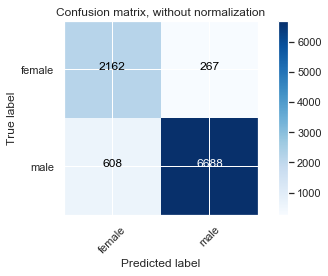

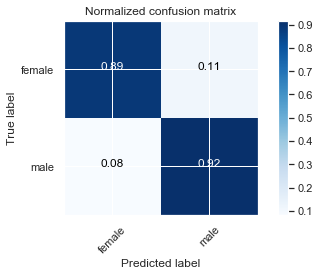

In [203]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = ['female','male']
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

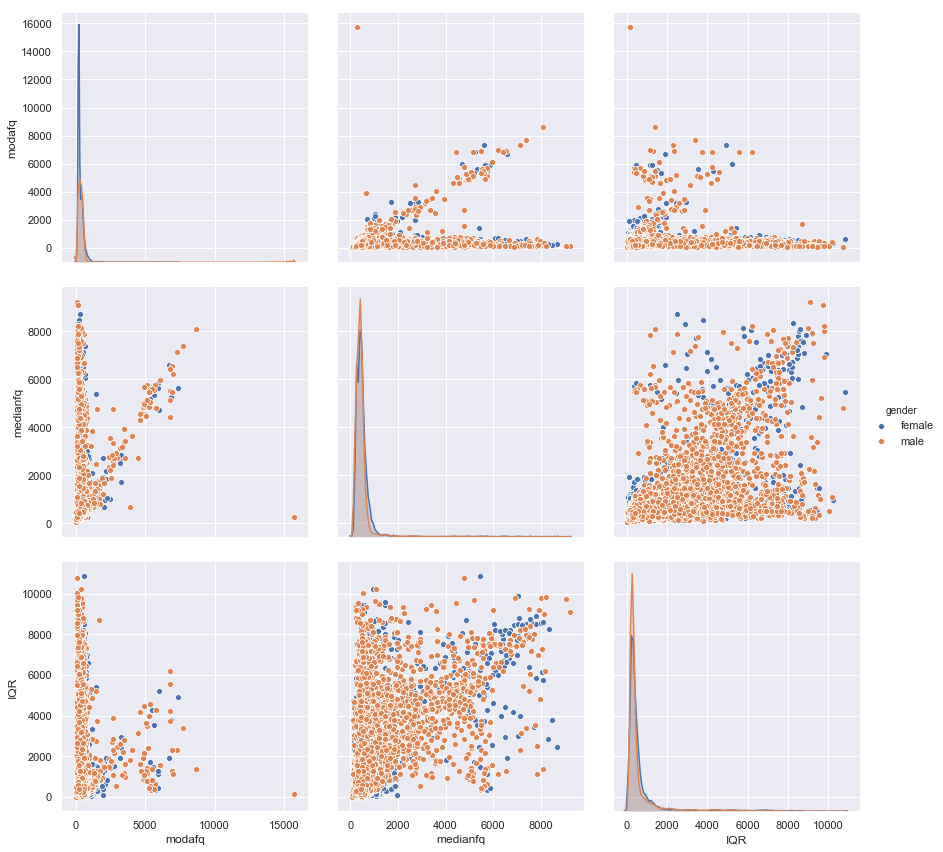

In [204]:
seaborn.pairplot(df[['gender','modafq','medianfq','IQR']], 
                 hue='gender', size=4)

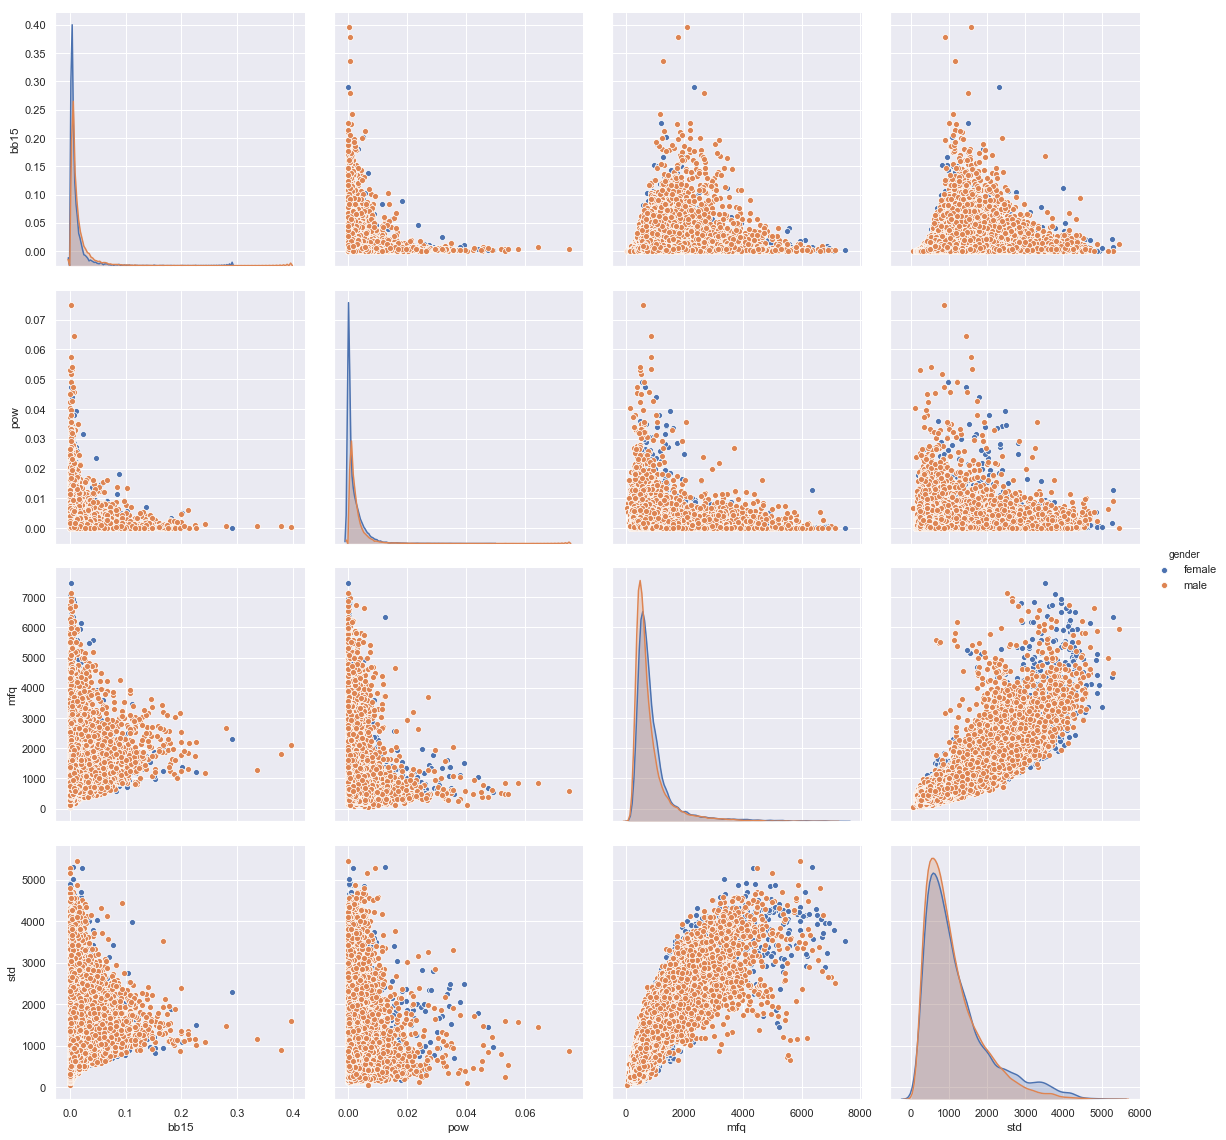

In [205]:
seaborn.pairplot(df[['gender','bb15','pow','mfq','std']], 
                 hue='gender', size=4)